# Jupyter widgets
[Jupyter widgets](https://ipywidgets.readthedocs.io/en/latest/index.html) are visual components that enhance the interaction with a Jupyter notebook. In this notebook we test some of the widgets. 

In [37]:
import os
import numpy as np
from osgeo import gdal, osr, ogr
import matplotlib.pyplot as plt
from skimage import io
from skimage import exposure
from skimage.io import imsave, imread
#from rasterio.plot import show
from IPython.display import display
from ipywidgets import Checkbox, VBox, HBox, Layout, Text, Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
print("NumPy version: %s"%np.__version__)
print("GDAL version: %s"%gdal.__version__)
warnings.filterwarnings('ignore')

NumPy version: 1.26.4
GDAL version: 3.9.2


## Interact
It is a widget that returns the value of a function for each value of its arguments passed through the widget. The type of widget depends on the type of argument passed to the function. For example, if we pass an integer interval thw widget used will be an integer slider.

In [2]:
def f(x):
    return x * x

In [3]:
w = interact(f, x=(0,9));

interactive(children=(IntSlider(value=4, description='x', max=9), Output()), _dom_classes=('widget-interact',)…

In [4]:
x = w.widget.children[0].get_state('value')['value']
x

4

In [5]:
f(x)

16

In [6]:
slider = widgets.IntSlider(value=0, min=0, max=10, step=1)
slider

IntSlider(value=0, max=10)

In [7]:
current_value = slider.value
current_value

0

In [8]:
import ipywidgets as widgets

slider = widgets.IntSlider(value=0, min=0, max=100, step=1)
output = widgets.Output()

def handle_slider_change(change):
    with output:
        output.clear_output()
        print(f"The new slider value is: {change.new}")

slider.observe(handle_slider_change, 'value')

widgets.VBox([slider, output])

## Checkbox
Checkboxes are used to select multiple elements from a collection, e.g. images.

In [9]:
a = widgets.Checkbox(description='a', layout=Layout(object_position='left'))
b = widgets.Checkbox(description='b', object_position='left')
c = widgets.Checkbox(description='c')

In [10]:
def f(a, b, c):
    #print('{}, {}, {}'.format(a, b, c))
    return [a, b, c]

In [11]:
out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})
w = widgets.HBox([widgets.HBox([a, b, c])])
display(w)

## Output widget

In [15]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [18]:
from IPython.display import YouTubeVideo
with out:
    display(YouTubeVideo('eWzY2nGfkXk'))

In [19]:
with out:
    display(widgets.IntSlider())

In [20]:
out.clear_output()

In [21]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, result))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c])])

In [26]:
img_path = 'images/'
img_list = []
for file in os.listdir(img_path):
    if file.endswith(".tif"):
        img_list.append(os.path.join(img_path, file))

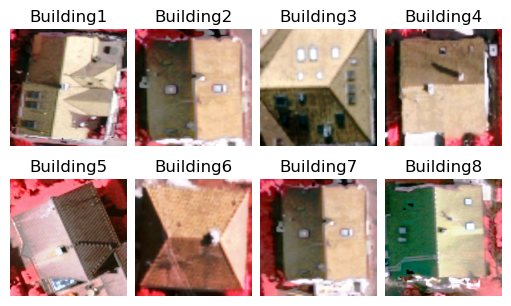

In [39]:
fig_rows = 2
fig_cols = 4
fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(5, 3), layout='constrained')
axs.flatten()
for i, ax in enumerate(axs.ravel()):
    img = imread(img_list[i])
    img_equalized = exposure.equalize_hist(img)
    title = img_list[i][-13:-4]
    ax.set_axis_off()
    ax.set_title(title)
    ax.imshow(img_equalized)